In [146]:
import pandas as pd
import numpy as np
import plotly.express as px
import numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap  
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 


In [6]:
heart_df = pd.read_csv("data/heart.csv")
heart_df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [8]:
#heart_df['female'] = heart_df['female'].map({'F': 1, 'M': 0})
heart_df['Sex'].replace('F',0 ,inplace=True)
heart_df['Sex'].replace('M', 1,inplace=True)
#Female is 0
#Male is 1

#ATA is 0
#NAP is 1
#ASY is 2
#TA is 3
heart_df['ChestPainType'].replace('ATA',0 ,inplace=True)
heart_df['ChestPainType'].replace('NAP',1 ,inplace=True)
heart_df['ChestPainType'].replace('ASY',2 ,inplace=True)
heart_df['ChestPainType'].replace('TA',3 ,inplace=True)

#Normal is 0
#St is 1
#LVH is 2
heart_df['RestingECG'].replace('Normal',0, inplace=True)
heart_df['RestingECG'].replace('ST',1, inplace=True)
heart_df['RestingECG'].replace('LVH',2, inplace=True)

#No is 0
#Yes is 1
heart_df['ExerciseAngina'].replace('N',0 ,inplace=True)
heart_df['ExerciseAngina'].replace('Y',1 ,inplace=True)

#ST_Slope
#Up is 0
#Flat is 1
#Down is 2
heart_df['ST_Slope'].replace('Up', 0, inplace = True)
heart_df['ST_Slope'].replace('Flat', 1, inplace = True)
heart_df['ST_Slope'].replace('Down', 2, inplace = True)

#My computer just crashed, sorry!
#np. Anthony is explaining scatter plots right now.

heart_df.head() #worky :)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,0,172,0,0.0,0,0
1,49,0,1,160,180,0,0,156,0,1.0,1,1
2,37,1,0,130,283,0,1,98,0,0.0,0,0
3,48,0,2,138,214,0,0,108,1,1.5,1,1
4,54,1,1,150,195,0,0,122,0,0.0,0,0


In [16]:
heart_df.dropna(inplace=True)
heart_df.shape

(918, 12)

**NOTE:** PLEASE save the scores to the score dictionary 

Models to try out:

- Decision Tree
- Naive Bayes
- Logistic Regression
- Random Forest
- Adaboost
- NEURAL NETWORKS 
- Support vector classifier 
- KNN  

<u>**AlSO TRY OPTIMIZING THEM**</u>

Evaluation metrics:

- F1 score
- Accuracy
- Recall
- Precision
- Confusion matrix



In [29]:
scores = {}
scores['metrics'] = {'accuracy': 'accuracy', 'precision':'precision', 'recall':'recall', 'f1_score':'f1_score'}

In [14]:
target = heart_df["HeartDisease"]
input_columns = heart_df.loc[:, heart_df.columns != "HeartDisease"]
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2)

In [15]:
x_train.shape

(734, 11)

In [19]:
KNN_model = KNN(n_neighbors = 7)
KNN_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [20]:
y_hat = KNN_model.predict(x_test)

[1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0
 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1
 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1]
[1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0
 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1
 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1
 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0
 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1]
0.30978260869565216
{'accuracy': 0.6902173913043478, 'precision': 0.6902173913043478, 'recall': 0.6902173913043478, 'f1_score': 0.6902173913043478}


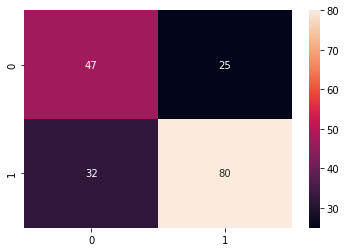

In [34]:
print(y_hat)
print(np.array(y_test))

total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')
acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat, average='micro')
recall = recall_score(y_test, y_hat, average='micro')
f1 = f1_score(y_test, y_hat, average='micro')
scores['KNN'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['KNN'])

[1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1
 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1
 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0
 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1]
[1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0
 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1
 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1
 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0
 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1]
0.1358695652173913
{'accuracy': 0.8641304347826086, 'precision': 0.8641304347826086, 'recall': 0.8641304347826086, 'f1_score': 0.8641304347826086}


/projects/d5a3aa23-997d-4ffc-977a-1dc20c583e62/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


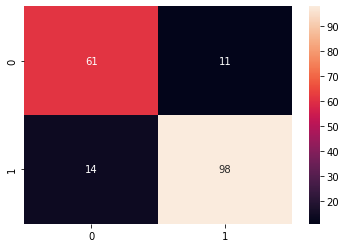

In [126]:
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(1000, 35), alpha=0.05, max_iter=200, random_state = 1, activation='relu', learning_rate='adaptive')
mlp.fit(x_train, y_train)
y_hat = mlp.predict(x_test)
print(y_hat)
print(np.array(y_test))
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')
acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat, average='micro')
recall = recall_score(y_test, y_hat, average='micro')
f1 = f1_score(y_test, y_hat, average='micro')
scores['mlp'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}
print(scores['mlp'])

In [46]:
# Please save scores like the example below
        scores['knn'] = {'accuracy': acc, 'precision':prec, 'recall':recall, 'f1_score':f1}

In [158]:
x = heart_df.loc[:, heart_df.columns != "HeartDisease"]
y = heart_df['HeartDisease']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)
cm= confusion_matrix(y_pred, y_test)
print(cm)
total_squared_error = (np.sum((y_test - y_pred)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)
"""x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2,x3,x4,x5,x6,x7,x8,x9,x10,x11 classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
plt.title('Logistic Regression (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()""" 

[[60 11]
 [17 96]]
0.15217391304347827


"x_set, y_set = x_train, y_train  \nx1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  \nnp.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  \nplt.contourf(x1, x2,x3,x4,x5,x6,x7,x8,x9,x10,x11 classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  \nalpha = 0.75, cmap = ListedColormap(('purple','green' )))  \nplt.xlim(x1.min(), x1.max())  \nplt.ylim(x2.min(), x2.max())  \nfor i, j in enumerate(np.unique(y_set)):  \n    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  \n        c = ListedColormap(('purple', 'green'))(i), label = j)  \nplt.title('Logistic Regression (Training set)')  \nplt.xlabel('Age')  \nplt.ylabel('Estimated Salary')  \nplt.legend()  \nplt.show()"

In [142]:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

ModuleNotFoundError: No module named 'tensorflow'